# Basic usage

Create an instance of PyFBU

In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import fbu
import uproot
import utils

np.random.seed(2018) # set the seed so that results are reproducible

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
myfbu = fbu.PyFBU()

Supply the input distribution to be unfolded as a 1-dimensional list for N bins, with each entry corresponding to the bin content.
Supply the response matrix where each row corresponds to a truth level bin.
The normalization of each row must be the acceptance efficiency of the corresponding bin (e.g. the normalization is 1 for resolution only unfolding).

In [3]:
f = uproot.open("../data/example.root")
data = f['data'].numpy
response = f['resmat'].numpy
# data = (array([100., 150., 160., 110.]), array([0., 1., 2., 3., 4.]))
# response = (array([[0.08, 0.06, 0.03, 0.02],    # first truth bin
#                    [0.01, 0.04, 0.07, 0.1 ]]),  # second truth bin
#            (array([0., 1., 2., 3., 4.]),        # x bin edges
#             array([0., 1., 2.])))               # y bin edges
# data[0]/response[0] >> bin content
# data[1]/response[1] >> bin edges

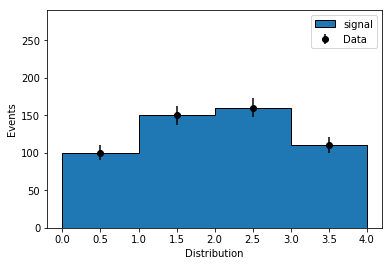

In [4]:
utils.plotYields(data[0].tolist(),signal=data[0].tolist(),bins=data[1].tolist())

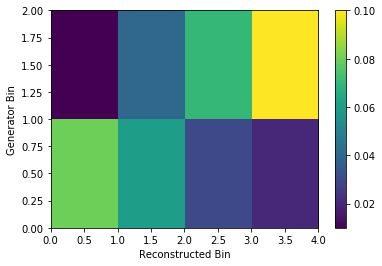

In [5]:
utils.plotResponseMatrix(response[0],bins=response[1])

Set the parameters for the FBU instance

In [6]:
myfbu.data     = data[0].tolist()
myfbu.response = response[0].tolist()

myfbu.lower = [0,0]         # lower bound on hyperbox
myfbu.upper = [3000,3000]   # upper bound on hyperbox
myfbu.nMCMC = 200000        # number of samplings
myfbu.monitoring = False    # diagnostics

Run the MCMC sampling (this step might take up to several minutes for a large number of bins and samplings).

In [7]:
myfbu.run()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [truth1]
>Metropolis: [truth0]
The number of effective samples is smaller than 10% for some parameters.


Retrieve the N-dimensional posterior distribution in the form of a list of N arrays.

In [8]:
trace = myfbu.trace
print "> Trace = ",trace 
print "> Size of trace     = ",len(trace)
print "> Entries per trace = ",len(trace[0])

> Trace =  [array([1352, 1491, 1473, ..., 1400, 1235, 1235]), array([1085, 1016, 1016, ..., 1103, 1103, 1020])]
> Size of trace     =  2
> Entries per trace =  800000


Each array corresponds to the projection of the posterior distribution for a given bin.

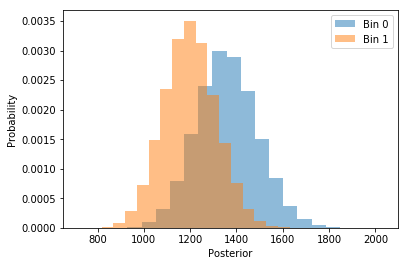

In [9]:
utils.plotPosteriors(trace)

For each unfolded bin, we can extract the mean and RMS.

In [10]:
utils.printPosteriors(trace)

 > Bin 0: 1359.54 ± 131.40
 > Bin 1: 1198.63 ± 113.99


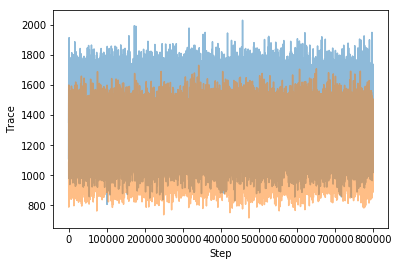

In [11]:
utils.plotTrace(trace)